#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html
* https://seaborn.pydata.org/examples/errorband_lineplots.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
fc = nn.Linear(in_features=5, out_features=3)

In [ ]:
fc.weight

Parameter containing:
tensor([[-0.3325,  0.3434,  0.0973, -0.2947,  0.4462],
        [-0.1455,  0.0106,  0.3694,  0.3890,  0.2440],
        [-0.2371,  0.0697, -0.3808,  0.4139, -0.1291]], requires_grad=True)

In [ ]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

In [ ]:
fc.weight

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [ ]:
model = nn.Sequential(
    # ...
    nn.Dropout(p=0.5)
)

In [ ]:
X = th.randn(1, 5)
X

tensor([[ 0.7423,  2.6818,  0.1275, -2.6456, -0.2874]])

In [ ]:
model(X) # scale: 1/(1-p)

tensor([[ 0.0000,  0.0000,  0.0000, -5.2912, -0.5749]])

In [ ]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [ ]:
model(X)

tensor([[ 0.7423,  2.6818,  0.1275, -2.6456, -0.2874]])

In [ ]:
model.train()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [ ]:
X = th.randn(100, 5)
X[:5]

tensor([[ 0.6534, -1.0073, -0.7082,  0.9475, -0.2506],
        [-2.2202,  0.9857, -0.5816, -0.9535,  2.6157],
        [ 0.1257,  0.5201, -1.3746, -0.2504, -1.0425],
        [-0.2677, -0.9877, -0.5806, -0.2482,  0.9711],
        [-0.7547, -0.1270,  0.5158, -1.2553,  0.4426]])

In [ ]:
X.mean(dim=0), X.std(dim=0), X.var(dim=0)

(tensor([-0.0880,  0.0078,  0.0381, -0.1239,  0.1607]),
 tensor([0.9468, 1.0602, 0.8780, 1.1927, 1.1447]),
 tensor([0.8964, 1.1240, 0.7708, 1.4226, 1.3105]))

In [ ]:
bn = nn.BatchNorm1d(num_features=5)
y = bn(X)

In [ ]:
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([-8.9407e-09, -1.1921e-08, -2.8610e-08, -3.2187e-08, -3.5763e-09],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

In [ ]:
bn.weight, bn.bias

(Parameter containing:
 tensor([1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0.], requires_grad=True))

In [ ]:
bn.running_mean

tensor([-0.0088,  0.0008,  0.0038, -0.0124,  0.0161])

In [ ]:
bn.running_var

tensor([0.9896, 1.0124, 0.9771, 1.0423, 1.0310])

In [ ]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [ ]:
y = bn(X)
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([-8.9407e-09, -1.1921e-08, -2.8610e-08, -3.2187e-08, -3.5763e-09],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch.nn as nn

class InitializedLinear(nn.Linear):
    def __init__(self, in_features, out_features, init_f, init_args=None, bias=True):
        super().__init__(in_features, out_features, bias=bias)
        if init_args is None:
            init_args = {}
        init_f(self.weight, **init_args)

In [ ]:
layer = InitializedLinear(2, 5, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})

# Проверка весов
print(layer.weight)

Parameter containing:
tensor([[0.6258, 0.6544],
        [0.3950, 0.0698],
        [0.0844, 0.6514],
        [0.9665, 0.1558],
        [0.1553, 0.3577]], requires_grad=True)


<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`
* `nn.xavier_normal_`
* `nn.kaiming_normal_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Обратите внимание, что от запуска к запуску результаты могут отличаться. Чтобы решить эту проблему, обучайте каждую модель несколько раз и визуализируйте доверительный интервал (можно воспользоваться `seaborn.lineplot`).

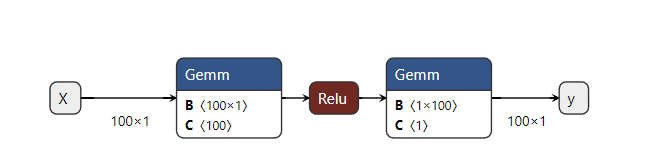

- [ ] Проверено на семинаре

In [ ]:
import torch as th
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class RegressionModel(nn.Module):
    def __init__(self, init_func=None, init_args=None):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(1, 100)
        self.layer2 = nn.Linear(100, 1)

        if init_func is not None:
            if init_args is None:
                init_args = {}
            init_func(self.layer1.weight, **init_args)
            init_func(self.layer2.weight, **init_args)

    def forward(self, x):
        x = th.relu(self.layer1(x))
        return self.layer2(x)

init_methods = {
    'uniform': (nn.init.uniform_, {"a": 0.0, "b": 1.0}),
    'normal': (nn.init.normal_, {"mean": 0.0, "std": 1.0}),
    'constant': (nn.init.constant_, {"val": 0.5}),
    'xavier_uniform': (nn.init.xavier_uniform_, {}),
    'xavier_normal': (nn.init.xavier_normal_, {}),
    'kaiming_uniform': (nn.init.kaiming_uniform_, {}),
    'kaiming_normal': (nn.init.kaiming_normal_, {})
}

In [ ]:
def train_model(init_method, init_args=None, epochs=200):
    model = RegressionModel(init_func=init_method, init_args=init_args)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_mse = []
    test_mse = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        train_mse.append(loss.item())

        # Оценка на тесте
        model.eval()
        with th.no_grad():
            test_pred = model(X_test)
            test_loss = criterion(test_pred, y_test)
            test_mse.append(test_loss.item())

    return train_mse, test_mse


In [ ]:
results = {}

for init_name, (init_func, init_args) in init_methods.items():
    train_mse_runs = []
    test_mse_runs = []

    for run in range(5):
        train_mse, test_mse = train_model(init_func, init_args)
        train_mse_runs.append(train_mse)
        test_mse_runs.append(test_mse)

    train_mse_avg = np.mean(train_mse_runs, axis=0)
    test_mse_avg = np.mean(test_mse_runs, axis=0)

    results[init_name] = (train_mse_avg, test_mse_avg)

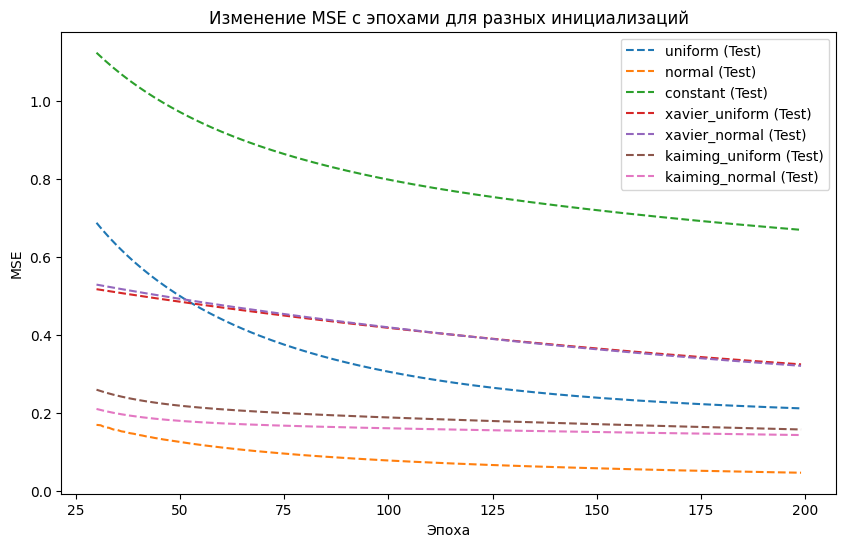

In [ ]:
plt.figure(figsize=(10, 6))

for init_name, (train_mse, test_mse) in results.items():
    #sns.lineplot(x=np.arange(len(train_mse))[30:], y=train_mse[30:], label=f"{init_name} (Train)")
    sns.lineplot(x=np.arange(len(test_mse))[30:], y=test_mse[30:], label=f"{init_name} (Test)", linestyle="--")

plt.title("Изменение MSE с эпохами для разных инициализаций")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.legend()
plt.show()

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

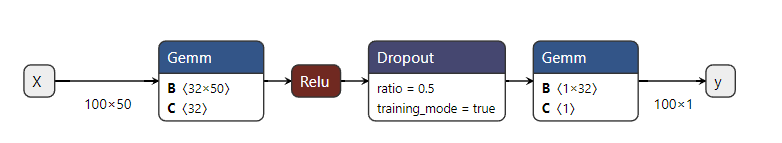

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import make_regression
import torch as th

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class RegressionModel(nn.Module):
    def __init__(self, p_dropout):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(50, 32)
        self.dropout = nn.Dropout(p=p_dropout)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = th.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

def train_model(p_dropout, epochs=100):
    model = RegressionModel(p_dropout)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_r2 = []
    test_r2 = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(X_train)
        loss = criterion(y_pred_train, y_train)
        loss.backward()
        optimizer.step()

        train_r2.append(r2_score(y_train.detach().numpy(), y_pred_train.detach().numpy()))

        model.eval()
        with th.no_grad():
            y_pred_test = model(X_test)
            test_r2.append(r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy()))

    return train_r2, test_r2

In [ ]:
# dropout
dropout_values = np.linspace(0, 0.8, 5)

results = {}

for p in dropout_values:
    train_r2, test_r2 = train_model(p_dropout=p)
    results[p] = (train_r2, test_r2)

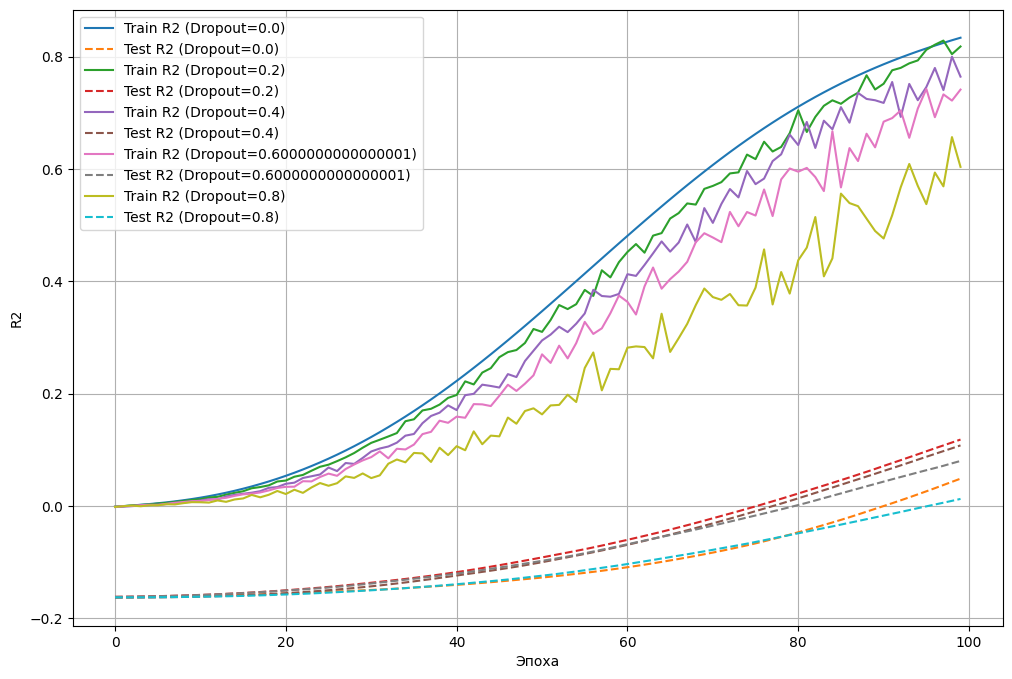

In [ ]:
plt.figure(figsize=(12, 8))

for p, (train_r2, test_r2) in results.items():
    sns.lineplot(x=np.arange(len(train_r2)), y=train_r2, label=f"Train R2 (Dropout={p})")
    sns.lineplot(x=np.arange(len(test_r2)), y=test_r2, label=f"Test R2 (Dropout={p})", linestyle="--")

plt.xlabel("Эпоха")
plt.grid()
plt.ylabel("R2")
plt.legend()
plt.show()

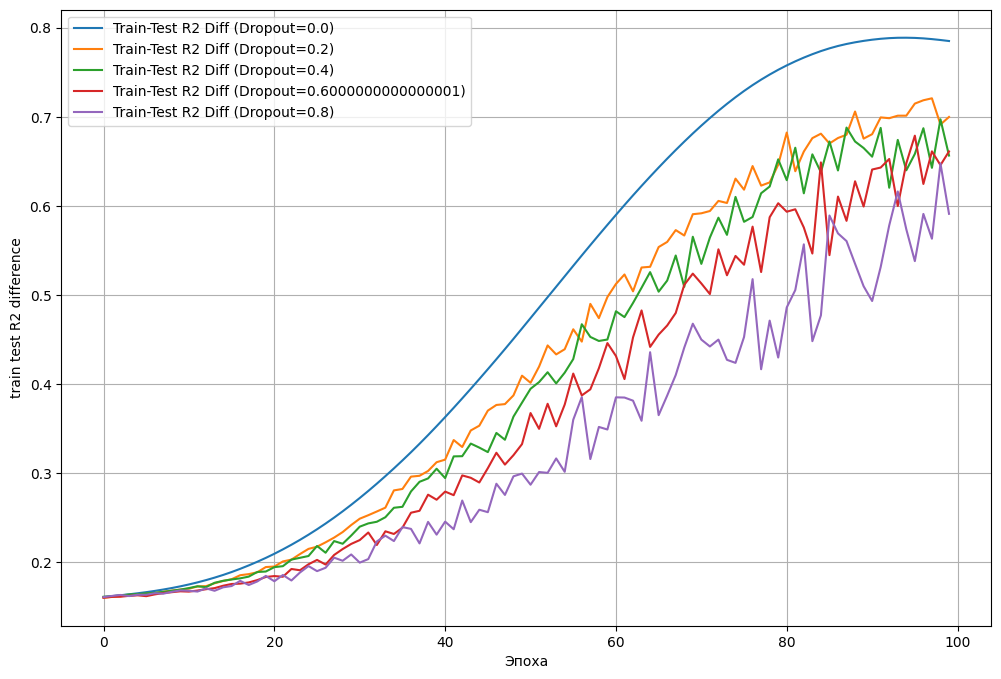

In [ ]:
plt.figure(figsize=(12, 8))

for p, (train_r2, test_r2) in results.items():
    r2_diff = np.array(train_r2) - np.array(test_r2)
    sns.lineplot(x=np.arange(len(r2_diff)), y=r2_diff, label=f"Train-Test R2 Diff (Dropout={p})")

plt.xlabel("Эпоха")
plt.ylabel("train test R2 difference")
plt.grid()
plt.legend()
plt.show()

<p class="task" id="4"></p>

4\. Решите задачу регрессии с и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

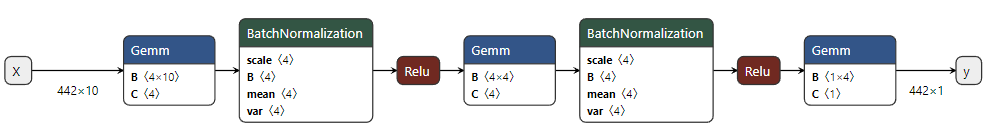

- [ ] Проверено на семинаре

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()
X.shape, y.shape

(torch.Size([442, 10]), torch.Size([442, 1]))

In [ ]:
import torch as th
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

class RegressionModelWithBN(nn.Module):
    def __init__(self):
        super(RegressionModelWithBN, self).__init__()
        self.fc1 = nn.Linear(10, 4)
        self.bn1 = nn.BatchNorm1d(4)
        self.fc2 = nn.Linear(4, 4)
        self.bn2 = nn.BatchNorm1d(4)
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = th.relu(self.bn1(self.fc1(x)))
        x = th.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

class RegressionModelWithoutBN(nn.Module):
    def __init__(self):
        super(RegressionModelWithoutBN, self).__init__()
        self.fc1 = nn.Linear(10, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = th.relu(self.fc1(x))
        x = th.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(model, learning_rate, epochs=200):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_r2 = []
    test_r2 = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(X_train)
        loss = criterion(y_pred_train, y_train)
        loss.backward()
        optimizer.step()

        train_r2.append(r2_score(y_train.detach().numpy(), y_pred_train.detach().numpy()))

        model.eval()
        with th.no_grad():
            y_pred_test = model(X_test)
            test_r2.append(r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy()))

    return train_r2, test_r2

In [ ]:
learning_rates = [0.001, 0.01, 0.1]

results_with_bn = {}
results_without_bn = {}

for lr in learning_rates:
    model_with_bn = RegressionModelWithBN()
    model_without_bn = RegressionModelWithoutBN()

    train_r2_with_bn, test_r2_with_bn = train_model(model_with_bn, learning_rate=lr)
    train_r2_without_bn, test_r2_without_bn = train_model(model_without_bn, learning_rate=lr)

    results_with_bn[lr] = (train_r2_with_bn, test_r2_with_bn)
    results_without_bn[lr] = (train_r2_without_bn, test_r2_without_bn)

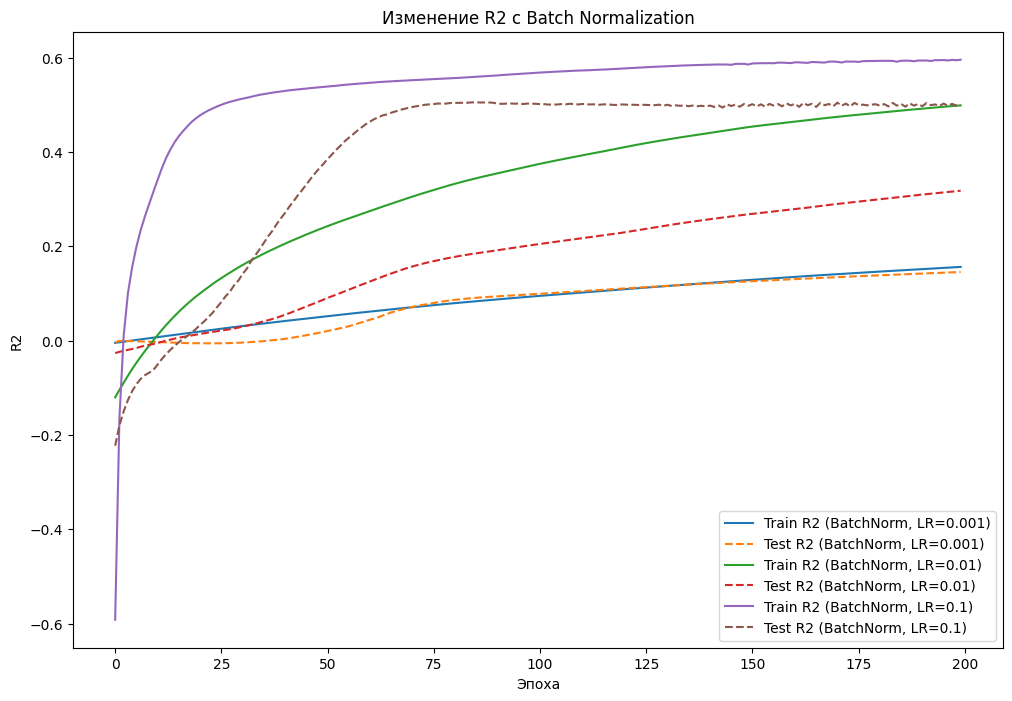

In [ ]:
plt.figure(figsize=(12, 8))

for lr, (train_r2, test_r2) in results_with_bn.items():
    sns.lineplot(x=np.arange(len(train_r2)), y=train_r2, label=f"Train R2 (BatchNorm, LR={lr})")
    sns.lineplot(x=np.arange(len(test_r2)), y=test_r2, label=f"Test R2 (BatchNorm, LR={lr})", linestyle="--")

plt.title("Изменение R2 с Batch Normalization")
plt.xlabel("Эпоха")
plt.ylabel("R2")
plt.legend()
plt.show()

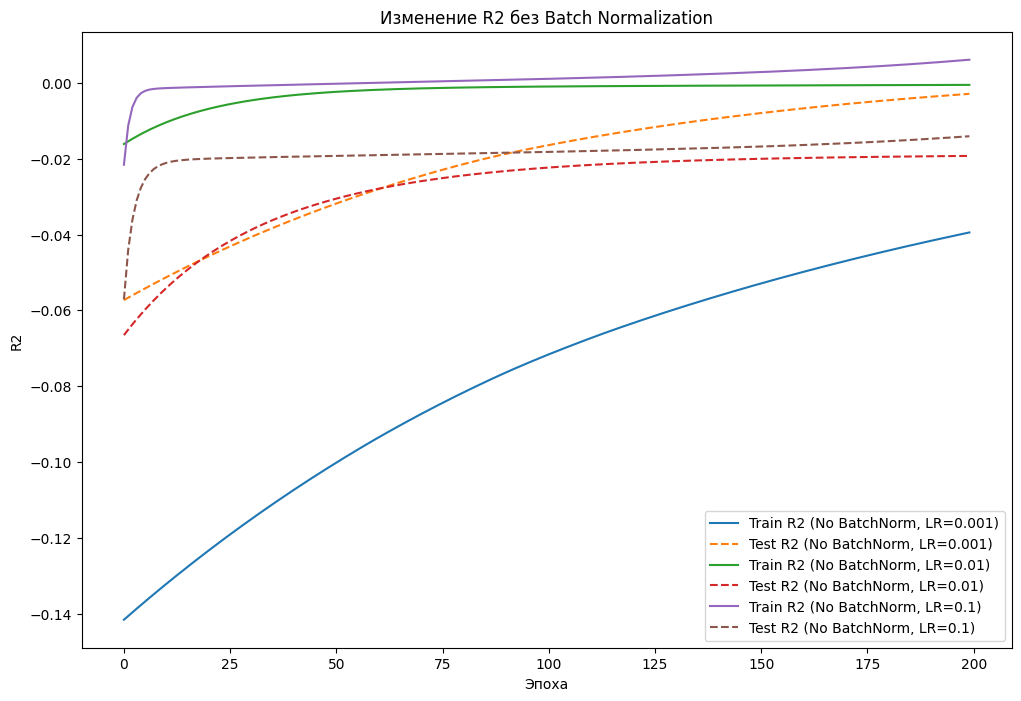

In [ ]:
plt.figure(figsize=(12, 8))

for lr, (train_r2, test_r2) in results_without_bn.items():
    sns.lineplot(x=np.arange(len(train_r2)), y=train_r2, label=f"Train R2 (No BatchNorm, LR={lr})")
    sns.lineplot(x=np.arange(len(test_r2)), y=test_r2, label=f"Test R2 (No BatchNorm, LR={lr})", linestyle="--")

plt.title("Изменение R2 без Batch Normalization")
plt.xlabel("Эпоха")
plt.ylabel("R2")
plt.legend()
plt.show()

обучение становится более стабильным и быстрым, что позволяет использовать более высокие скорости обучения.

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagrad, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [ ]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
X = (X - X.mean(dim=0)) / X.std(dim=0)

In [ ]:
class SimpleRegressor(nn.Module):
    def __init__(self):
        super(SimpleRegressor, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 32)
        self.fc2 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

def train_model(optimizer_name, lr=0.01, epochs=100):
    model = SimpleRegressor()
    criterion = nn.MSELoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "Adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=lr)
    elif optimizer_name == "RMSProp":
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
    elif optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr)

    mape_values = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        predictions = model(X)

        loss = criterion(predictions, y)

        loss.backward()
        optimizer.step()
        with torch.no_grad():
            mape = torch.mean(torch.abs((y - predictions) / y)) * 100
            mape_values.append(mape)

    return mape_values

In [ ]:
# обучение
learning_rate = 0.01
epochs = 100
optimizers = ["Adam", "Adagrad", "RMSProp", "SGD"]
results = {}

for opt in optimizers:
    results[opt] = train_model(optimizer_name=opt, lr=learning_rate, epochs=epochs)

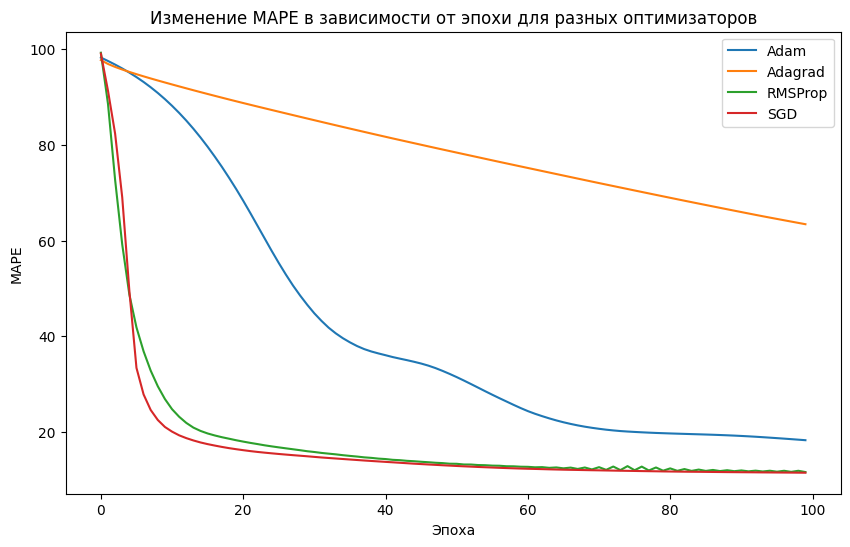

In [ ]:
plt.figure(figsize=(10, 6))

for opt in optimizers:
    plt.plot(range(epochs), results[opt], label=f'{opt}')

plt.title('Изменение MAPE для разных оптимизаторов')
plt.xlabel('Эпоха')
plt.ylabel('MAPE')
plt.legend()
plt.show()